In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines
from scipy import stats

In [4]:
df = pd.read_csv("fichFinalAtualizado20182021.csv", sep=';', encoding='latin-1')
df.head()

,Titulo,Autores,Ano,Instituicao,Imagem,Dataset,Ranking/Neural,ROI,Metricas,n Imagens
0,3D Convolutional Neural Network and Stacked Bi...,n121,2018.0,Shenzhen University,"MRI, PET",ADNI,Neural,Other Anatomical,"A,S,R",397[100-128-76-93]
1,A Novel Deep Learning Framework on Brain Funct...,n136,2018.0,University of North Carolina at Chapel Hill,MRI,ADNI,Neural,Other Anatomical,"A,S,R",351[172-179-0]
2,Deep Convolutional Neural Networks for Automat...,n148,2018.0,Georgia State University,MRI,"ADNI, OASIS",Neural,Other Anatomical,NaN,1726[537-806-347]
3,Early Detection of AlzheimerÍs Disease Using D...,n245,2018.0,Guangdong University of Technology,MRI,ADNI,Neural,whole brain,NaN,509[162-134-76-137]
4,Non-white matter tissue extraction and deep co...,n333,2018.0,Chonnam National University,"MRI, PET",ADNI,Neural,Other Anatomical,A,615[207-215-193]


In [5]:
#df[df['Ranking/Neural'] == 'Neural']
print(df.columns)
df[df['Ranking/Neural'] == 'Neural'][['Autores','Imagem','ROI']]

Index(['Titulo', 'Autores', 'Ano', 'Instituicao', 'Imagem', 'Dataset',
       'Ranking/Neural', 'ROI', 'Metricas', 'n Imagens'],
      dtype='object')


,Autores,Imagem,ROI
0,n121,"MRI, PET",Other Anatomical
1,n136,MRI,Other Anatomical
2,n148,MRI,Other Anatomical
3,n245,MRI,whole brain
4,n333,"MRI, PET",Other Anatomical


In [6]:
df['Instituicao'].value_counts().head(8)

University of North Carolina at Chapel Hill    1
Shenzhen University                            1
Georgia State University                       1
Chonnam National University                    1
Guangdong University of Technology             1
xxx                                            1
Name: Instituicao, dtype: int64

In [7]:
df.sort_values('Instituicao')

,Titulo,Autores,Ano,Instituicao,Imagem,Dataset,Ranking/Neural,ROI,Metricas,n Imagens
4,Non-white matter tissue extraction and deep co...,n333,2018.0,Chonnam National University,"MRI, PET",ADNI,Neural,Other Anatomical,A,615[207-215-193]
2,Deep Convolutional Neural Networks for Automat...,n148,2018.0,Georgia State University,MRI,"ADNI, OASIS",Neural,Other Anatomical,NaN,1726[537-806-347]
3,Early Detection of AlzheimerÍs Disease Using D...,n245,2018.0,Guangdong University of Technology,MRI,ADNI,Neural,whole brain,NaN,509[162-134-76-137]
0,3D Convolutional Neural Network and Stacked Bi...,n121,2018.0,Shenzhen University,"MRI, PET",ADNI,Neural,Other Anatomical,"A,S,R",397[100-128-76-93]
1,A Novel Deep Learning Framework on Brain Funct...,n136,2018.0,University of North Carolina at Chapel Hill,MRI,ADNI,Neural,Other Anatomical,"A,S,R",351[172-179-0]
...,...,...,...,...,...,...,...,...,...,...
86,Deep Learning-Based Classification and Voxel-B...,n1487,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,A Low-Cost Three-Dimensional DenseNet Neural N...,n1540,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Deep learning based Alzheimer's disease early ...,n106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,A CNN based framework for classification of Al...,n348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-8-dcf5eee964d0>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "square" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('relashion_'+ i.replace('/','-') +'_'+ j.replace('/','-') +'.eps',transparent=True, bbox_inches='tight', pad_inches=0,square=True)
<ipython-input-8-dcf5eee964d0>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "square" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('relashion_'+ i.replace('/','-') +'_'+ j.replace('/','-') +'.eps',transparent=True, bbox_inches='tight', pad_inches=0,square=True)
<ipython-input-8-dcf5eee964d0>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "square" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('relashion_'+ i.replace('/','-') +'_'+ j.replace('/','-') +'.eps',transparent=Tru

<Figure size 1440x864 with 0 Axes>

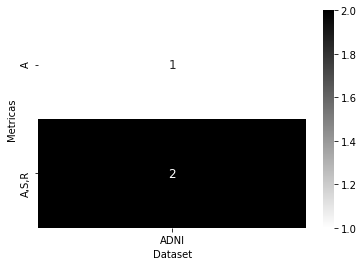

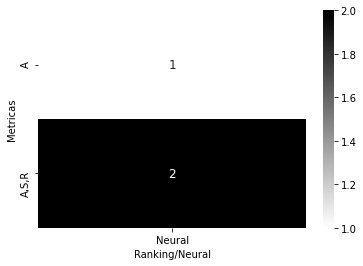

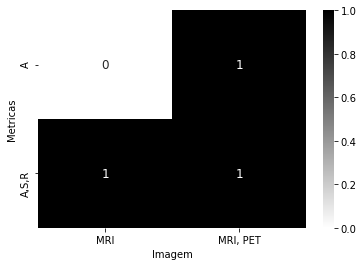

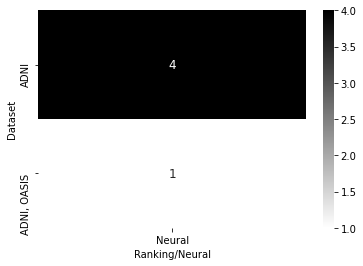

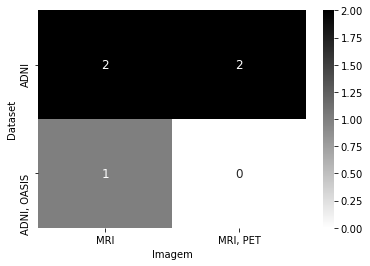

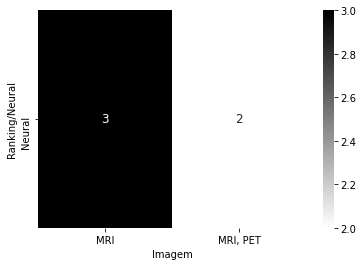

In [8]:
#creating manually a pairplot
dataForIteration = ['Metricas', 'Dataset', 'Ranking/Neural', 'Imagem']
ax = plt.figure(figsize=(20, 12))
counter = 1
for iidx,i in enumerate(dataForIteration):
    for j in dataForIteration[iidx+1:]:
        plt.figure()
        sns.heatmap(pd.crosstab(df[i],df[j]),cmap='binary',annot=True,  annot_kws={"size":12})
        plt.axis('on')
        plt.savefig('relashion_'+ i.replace('/','-') +'_'+ j.replace('/','-') +'.eps',transparent=True, bbox_inches='tight', pad_inches=0,square=True)
        
        
        #plt.subplot(4, 4, counter)
        #if i != j:
            #if (counter == 13):
            #    sns.heatmap(pd.crosstab(df[i],df[j]),cmap='binary',annot=True)
            #elif( counter in (1,5,9)):
            #    sns.heatmap(pd.crosstab(df[i],df[j]),cmap='binary',xticklabels=False,annot=True)
            #elif(counter in (14,15,16)):
            #    sns.heatmap(pd.crosstab(df[i],df[j]),cmap='Greys', yticklabels=False,annot=True)
            #else:
            #    sns.heatmap(pd.crosstab(df[i],df[j]),cmap='Greys',xticklabels=False, yticklabels=False,annot=True)
        ##else:
            ##plt.hist(df[i])
        #counter = counter + 1
##sns.heatmap(pd.crosstab(df['Dataset'],df['Imagem']),cmap='coolwarm')


#for i in range(1, 7):

    #plt.text(0.5, 0.5, str((2, 3, i)),
    #         fontsize=18, ha='center')



<BarContainer object of 2 artists>

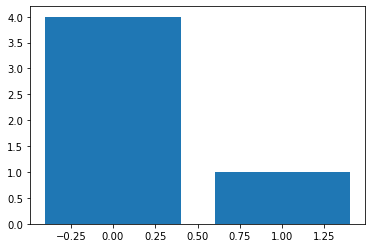

In [9]:
plt.bar(range(len(df['Dataset'].value_counts().index)),df['Dataset'].value_counts())

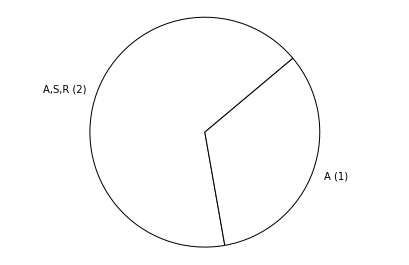

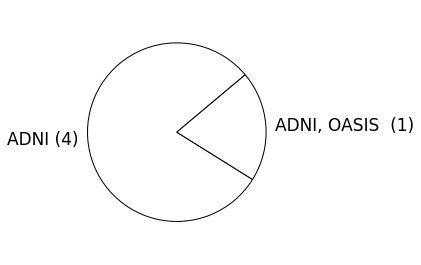

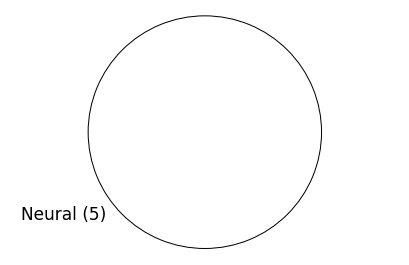

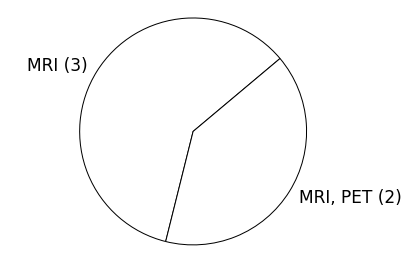

In [10]:
attribute = 'Metricas'
#Metricas Dataset Ranking/Neural Imagem
def make_disp(label,value):
    return label+' ('+value+')'

dataForIteration = ['Metricas', 'Dataset', 'Ranking/Neural', 'Imagem']

for data in dataForIteration:
    plt.figure()
    colors1 = np.array([[1, 1, 1],[0, 0, 0],[0.5, 0.5, 0.5],[0.2, 0.2, 0.2],
                        [0.8, 0.8, 0.8],[0.4, 0.4, 0.4],[0.7, 0.7, 0.7],[0.3, 0.3, 0.3],
                        [0.6, 0.6, 0.6],[0.1, 0.1, 0.1],[0.9,0.9,0.9]])

    labels = df[data].value_counts().keys()
    sizes = df[data].value_counts()

    #patterns = ('.','-', '+', 'x', '\\', '*', 'o', 'O','o','\\')
    patches, texts = plt.pie(sizes ,labels = labels + ' (' + sizes.astype(str)+')',startangle=40,colors=['white']*len(sizes))
    #for patch, pattern in zip(patches,patterns):
       # patch.set_hatch(pattern)
    #    patch.set_linewidth(1)
    #    patch.set_edgecolor('black')

    for patch in patches:
        patch.set_linewidth(1)
        patch.set_edgecolor('black')
    plt.axis('equal')
    plt.tight_layout()
    #plt.show()
    plt.axis('on')
    plt.rcParams['font.size'] = 17.0
    plt.tight_layout()
    plt.savefig('pizza'+data.replace('/','-')+'.jpg',transparent=True, bbox_inches='tight', pad_inches=0)
    

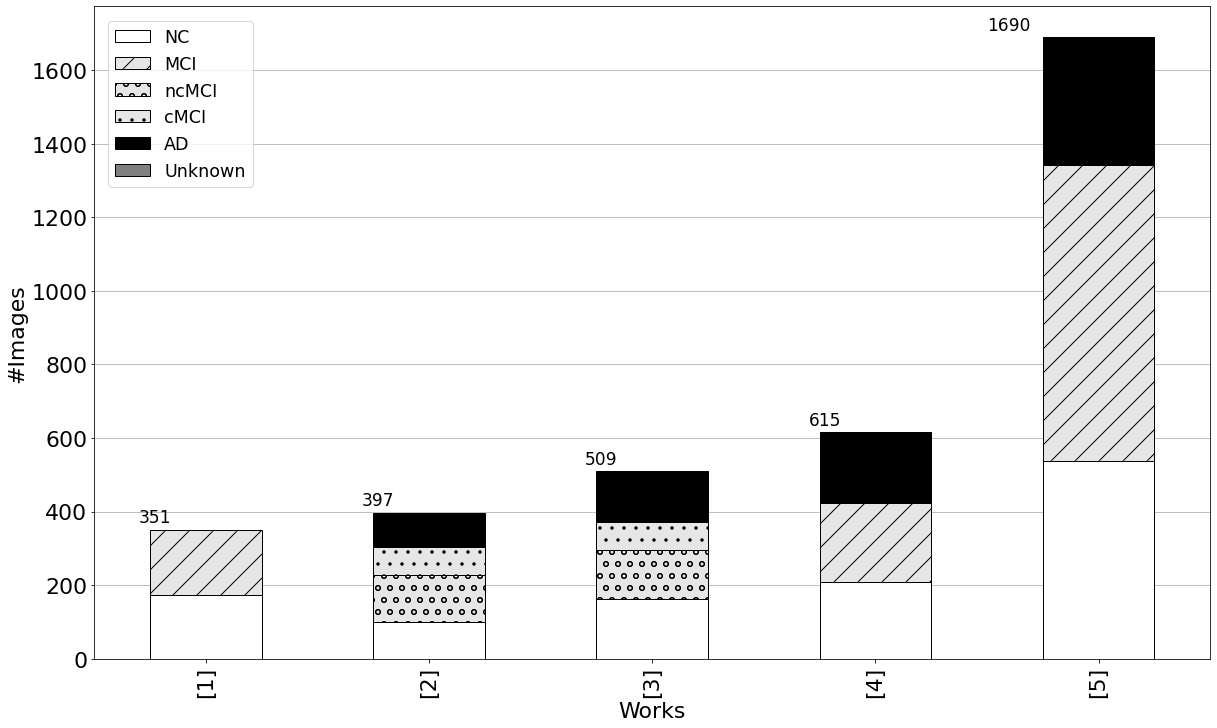

In [16]:
#plot qtdImages

level_nc = []
level_mci = []
level_ad = []
level_ncmci = []
level_cmci = []
unknown = []
total_value = []

for line in df['n Imagens']:
    if pd.isnull(line):
        break
    cropped = line.split('[')
    if len(cropped) == 1:
        val_nc = val_mci = val_ad = val_ncmci = val_cmci = 0
        val_ukn= int(cropped[0])
        
        #print(val_nc,"   ",val_mci,"   ",val_ad,"   ",val_ncmci,"   ",val_cmci,"   ",int(val_ukn[0]),'\n')
    else:
        stages = cropped[1].replace(']','').split('-')
        if len(stages) == 3:
            val_nc = int(stages[0])
            val_mci = int(stages[1])
            val_ad = int(stages[2])
            val_ncmci = val_cmci = val_ukn = 0
            #print(val_nc,"   ",val_mci,"   ",val_ad,"   ",val_ncmci,"   ",val_cmci,"   ",val_ukn,'\n')
        else:
            val_nc = int(stages[0])
            val_ncmci = int(stages[1])
            val_cmci = int(stages[2])
            val_ad = int(stages[3])
            val_mci = val_ukn = 0
            #print(val_nc,"   ",val_mci,"   ",val_ad,"   ",val_ncmci,"   ",val_cmci,"   ",val_ukn,'\n')
    val_total = val_nc+val_mci+val_ad+val_ncmci+val_cmci+val_ukn
    level_nc.append(val_nc)
    level_mci.append(val_mci)
    level_ad.append(val_ad)
    level_ncmci.append(val_ncmci)
    level_cmci.append(val_cmci)
    unknown.append(val_ukn)
    total_value.append(val_total)
    

level_nc    = np.reshape(np.array(level_nc),(len(level_nc),1))
level_mci   = np.reshape(np.array(level_mci),(len(level_nc),1))
level_ad    = np.reshape(np.array(level_ad),(len(level_nc),1))
level_ncmci = np.reshape(np.array(level_ncmci),(len(level_nc),1))
level_cmci  = np.reshape(np.array(level_cmci),(len(level_nc),1))
unknown     = np.reshape(np.array(unknown),(len(level_nc),1))
total_value = np.array(total_value)

y = np.concatenate((level_nc,level_mci,level_ncmci,level_cmci,level_ad,unknown),axis=1)
dfx = pd.DataFrame(y,columns=['NC','MCI','ncMCI','cMCI','AD','Unknown'])
dfx = dfx.reindex(dfx.sum(axis=1).sort_values().index)


ax = plt.figure(figsize=(20, 12)).add_subplot(111)
dfx.plot(ax=ax,kind='bar',color='white', stacked=True,zorder=3)
#ax.set_yscale('log',basey=2)
bars = ax.patches
patterns =(' ', '/','o','.',' ',' ')

#colors  = ('red','blue','green','yellow','purple','gray') 
colors = np.array([[1, 1, 1],[0.9, 0.9, 0.9],[0.9, 0.9, 0.9],[0.9, 0.9, 0.9],[0, 0, 0],[0.5, 0.5, 0.5]])
hatches = [p for p in patterns for i in range(len(dfx))]
colors  = [p for p in colors for i in range(len(dfx))]

for bar, hatch, color in zip(bars, hatches, colors):
    bar.set_edgecolor(color='black')
    bar.set_facecolor(color=color)
    bar.set_hatch(hatch)

total_value.sort()    
for i in range(0,len(level_cmci)):
    label = str(total_value[i])
    if(total_value[i]-10**2 < 0):
        plt.text(i-0.2,total_value[i]+20,label)
    elif(total_value[i]-10**3 < 0):
        plt.text(i-0.3,total_value[i]+20,label)
    else:
        plt.text(i-0.5,total_value[i]+20,label)
ax.yaxis.grid()
ax.legend(loc='center right', bbox_to_anchor=(0.15, 0.85), fontsize=17.5)
p = ax.set_xticklabels((('['+str(x)+']') for x in range(1,len(level_mci)+1)))
ax.set_xlabel('Works', fontsize=22)
ax.set_ylabel('#Images', fontsize=22)
ax.tick_params(labelsize=22)    

plt.axis('on')
plt.savefig('sizeDatasets.jpg',transparent=True, bbox_inches='tight', pad_inches=0)

In [17]:
median = np.median(total_value)
mode = int(stats.mode(total_value).mode)
avg = total_value.mean()
print(median, ' ', mode, ' ', avg)

509.0   351   712.4


In [18]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph
from reportlab.lib.styles import ParagraphStyle
from reportlab.lib.enums import TA_JUSTIFY,TA_LEFT,TA_CENTER,TA_RIGHT
doc = SimpleDocTemplate("Alzheimers Report.pdf", pagesize=letter)

elements = []
p = ParagraphStyle('parrafos',
                   fontSize = 10,
                   fontName="Times-Roman")
pred = ParagraphStyle('parrafos',
                   fontSize = 10,
                   fontName="Times-Roman",
                   textColor=colors.red)
p1 = ParagraphStyle('parrafos',
                   fontSize = 12,
                   fontName="Times-Roman",
                   alignment = TA_CENTER)
pfoot = ParagraphStyle('parrafos',
                   fontSize = 9,
                   fontName="Times-Roman",
                   alignment = TA_CENTER)

#t=Table(data)
#t.setStyle(TableStyle([('BACKGROUND',(1,1),(-2,-2),colors.green),
#                       ('TEXTCOLOR',(0,0),(1,-1),colors.red)]))
matrix = np.array(df)
count = 0

for line in matrix:
    
    elements.append(Paragraph("<br/>"+str(line[1]) + " - " + str(line[3]) + "<br/>", p1))
    elements.append(Paragraph(str(line[4]) + "<br/>", pfoot))
    
    elements.append(Paragraph("Problema: ",pred))
    elements.append(Paragraph(str(line[5]) + "<br/>", p))
    elements.append(Paragraph('Contribuição: ',pred))
    elements.append(Paragraph(str(line[6]) + "<br/>", p))
    elements.append(Paragraph('Resultado: ',pred))
    elements.append(Paragraph(str(line[7]) + "<br/>", p))
    elements.append(Paragraph('Fluxo: ',pred))
    elements.append(Paragraph(str(line[8]) + "<br/>", p))
    elements.append(Paragraph('Metodologia: ',pred))
    elements.append(Paragraph(str(line[9]) + "<br/>", p))    
    elements.append(Paragraph('Relevancia: ',pred))
    elements.append(Paragraph(str(line[10]) + "<br/>", p))
    elements.append(Paragraph('Imagem: ',pred))
    elements.append(Paragraph(str(line[11]) +', Dataset: '+line[12] + "<br/>", p))
    elements.append(Paragraph('Ranking/Neural: ',pred))
    elements.append(Paragraph(str(line[13]) + "<br/>", p))
    elements.append(Paragraph('ROI: ',pred))
    elements.append(Paragraph(str(line[14]) + "<br/>", p))
    elements.append(Paragraph('Metricas: ',pred))
    elements.append(Paragraph(str(line[15]) + "<br/>", p))
    elements.append(Paragraph('Resultado Valores: ',pred))
    elements.append(Paragraph(str(line[16]) + "<br/>", p))
    elements.append(Paragraph('Divisão Avaliação: ',pred))    
    elements.append(Paragraph(str(line[17]) + "<br/>", p))
    #break;
# write the document to disk
doc.build(elements)

ModuleNotFoundError: No module named 'reportlab'

<ipython-input-25-22fa130c0348>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  p = ax.set_xticklabels("a Accuracy Specificity Recall F1-score Precision MAP".split(" "))


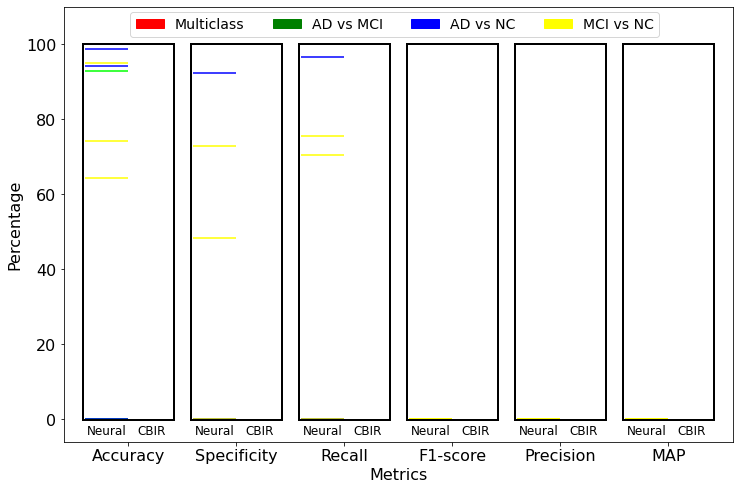

In [25]:
plt.rcParams['font.size'] = 8.0

#importing list of results and convert nan to 0
df_results = pd.read_csv("resultadosPlotAtualizado20182021.csv", sep=';', encoding='latin-1')
df_results.fillna(value=0,inplace=True)
mat_QttResults = np.array(df_results)
mat_QttResults = np.nan_to_num(mat_QttResults)

#create a list of indexes for ranking and neural
neural_idx = list()
ranking_idx = list()
for ndx, member in enumerate(mat_QttResults[0][2:]):
    if member == 1.:
        neural_idx.append(ndx);
    else:
        ranking_idx.append(ndx);

mat_QttResults = mat_QttResults[1:,2:]

neural_results =  mat_QttResults[:,neural_idx]
ranking_results =  mat_QttResults[:,ranking_idx]

#data1 = mat_QttResults

colors = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0],
                    [1, 0, 0],[0, 1, 0],[0, 0, 1],[1, 1, 0]
                   ])


lineoffsets1 = np.array([-16, -16, -16, -16, 
                         -11, -11, -11, -11,
                         -6, -6, -6, -6, 
                         -1, -1, -1, -1,  
                         4, 4, 4, 4, 
                         9, 9, 9, 9
                        ])

lineoffsets2 = np.array([-14, -14, -14, -14, 
                         -9, -9, -9, -9,
                         -4, -4, -4, -4, 
                         1, 1, 1, 1,  
                         6, 6, 6, 6, 
                         11, 11, 11, 11
                        ])
linelengths = np.ones(24)*2

fig, ax = plt.subplots(1,figsize=(12,8))


# Add the patch to the Axes

plt.eventplot(neural_results, colors=colors, lineoffsets=lineoffsets1,
                    linelengths=linelengths, orientation='vertical')
plt.eventplot(ranking_results, colors=colors, lineoffsets=lineoffsets2,
                    linelengths=linelengths, orientation='vertical')

for i in range(6):
    rect = Rectangle(((i*5-17.1),-0.2),4.2,100.4,linewidth=2,edgecolor='k',facecolor='none')
    plt.text(5*i-16.9,-4,'Neural',fontsize=12)
    plt.text(5*i-14.6,-4,'CBIR',fontsize=12)
    ax.add_patch(rect)
    ln = patches.mlines.Line2D([(i*5-17.1),(i*5-12.9)],[-0.2,-0.2],2,color='k')
    ax.add_line(ln)
    #fig.patches.extend([plt.Rectangle(((i*5-17),0),4,100,linewidth=2,edgecolor='k',facecolor='none')])

#ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=6, fontsize=17.5)
p = ax.set_xticklabels("a Accuracy Specificity Recall F1-score Precision MAP".split(" "))
ax.set_xlabel('Metrics', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.tick_params(labelsize=16)    
plt.xlim(-18, 13) 
plt.ylim(-6,110)
ax.legend(handles=[ patches.Patch(color='red', label='Multiclass'),
                     patches.Patch(color='green', label='AD vs MCI'),
                     patches.Patch(color='blue', label='AD vs NC'),
                     patches.Patch(color='yellow', label='MCI vs NC')
                   ],loc='center right', bbox_to_anchor=(0.9, 0.96), ncol=6, fontsize=14)
#ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=6, fontsize=17.5)
#plt.show()
plt.axis('on')
plt.savefig('results.jpg',transparent=True, bbox_inches='tight', pad_inches=0)

In [26]:
df_results

,Work,Work.1,n121,n136,n333
0,What,Method,1.00,1.00,1.0
1,Accuracy,MultiClass,0.00,0.00,0.0
2,Accuracy,AD vs MCI,0.00,0.00,93.0
3,Accuracy,AD vs NC,94.29,0.00,98.8
4,Accuracy,MCI vs NC,64.47,74.23,95.0
5,Specificity,MultiClass,0.00,0.00,0.0
6,Specificity,AD vs MCI,0.00,0.00,0.0
7,Specificity,AD vs NC,92.38,0.00,0.0
8,Specificity,MCI vs NC,48.41,72.92,0.0
9,Recall,MultiClass,0.00,0.00,0.0


In [27]:
df2 = np.array(df_results)
df2 = pd.DataFrame(df2[1:],columns=df_results.columns)
df2 = df2.T

In [28]:
works_list = np.array(df_results.columns)
np_metrics = np.array(df2)
works_list = works_list[2:]
works_list = ['\cite{'+work.split('.')[0]+'}' for work in works_list]
works_list = np.array(works_list)
works_list = np.reshape(works_list,(len(works_list),1))
print(works_list.shape)

(3, 1)


In [29]:
[multiclasse,ad_mci,ad_nc,mci_nc] = [0,1,2,3]
charar = np.empty((len(np_metrics)-2, 4),dtype=object)
charar[:] = ''

op = 0
for i, amostra in enumerate(np_metrics[2:,:]):
    for j, coluna in enumerate(amostra):
        if coluna!=0:
            vdd_j = j%4
            charar[i,vdd_j] = charar[i,vdd_j]+np_metrics[0,j][0] + ':' + str(coluna)+','


charar = np.hstack((works_list,charar))      
content_table = '\\'.join(['&'.join(row) for row in charar])
content_table.replace(',&','&').replace(',\\','\\')

'\\cite{n121}&&&A:94.29,S:92.38,R:96.59&A:64.47,S:48.41,R:70.43\\\\cite{n136}&&&&A:74.23,S:72.92,R:75.51\\\\cite{n333}&&A:93.0&A:98.8&A:95.0,'

In [30]:
charar

array([['\\cite{n121}', '', '', 'A:94.29,S:92.38,R:96.59,',
        'A:64.47,S:48.41,R:70.43,'],
       ['\\cite{n136}', '', '', '', 'A:74.23,S:72.92,R:75.51,'],
       ['\\cite{n333}', '', 'A:93.0,', 'A:98.8,', 'A:95.0,']],
      dtype=object)

In [31]:
o = (('['+str(x)+']') for x in range(1,len(level_mci)+1))
for i in o:
    print(i)

[1]
[2]
[3]
[4]
[5]


In [26]:
a = (0 for i in range(0,10))

In [27]:
np.ones(20)*4

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4.])